
# Self Organizing Maps example - California Housing

In this document, the SOMPY lib is going to be used in order to provide an example of usage of the Self Organising Maps algorithm. The data to be used will be the California Housing dataset, included in the SciKit Learn library and included below

In [61]:
!pip install git+https://github.com/sevamoo/SOMPY.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/sevamoo/SOMPY.git to /tmp/pip-req-build-8fu6gidl
  Running command git clone -q https://github.com/sevamoo/SOMPY.git /tmp/pip-req-build-8fu6gidl


In [62]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing 

import sompy

## Data Loading

First of all the data is loaded into the local environment as a numpy array. 

In [63]:
data = fetch_california_housing()
descr = data.DESCR
names = fetch_california_housing().feature_names+["HouseValue"]

data = np.column_stack([data.data, data.target])
print(descr)
print( "FEATURES: ", ", ".join(names))

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## SOM Training

The SOM training consists in 2 phases: the rough and the finetune one. The parameters that can be configured in the training step are:

- The size of each individual grid
- The rough and finetune iterations
- The rough and finetune initial and final radiuses
- The initialization mechanism (random/pca)

For the current example, only the rough/finetune iterations and the initialization mechanism parameters have been chosen. The other ones have not been specified so that the algorithm will choose them authomatically.  

For quantifying the error of the approximation, 2 metrics should be computed: 

- **The quantization error**: average distance between each data vector and its BMU.
- **The topographic error**: the proportion of all data vectors for which first and second BMUs are not adjacent units.

A rule of thumb is to generate several models with different parameters and choose the one which, having a topographic error very near to zero, has the lowest quantization error. It is important to hold the topographic error very low in order to make the components smooth and easy to understand. 

In [64]:
sm = sompy.SOMFactory().build(data, normalization = 'var', initialization='random', component_names=names)

sm.train(n_job=1, verbose='info', train_rough_len=5, train_finetune_len=15)

 Training...
 random_initialization took: 0.002000 seconds
 Rough training...
 radius_ini: 9.000000 , radius_final: 1.500000, trainlen: 5

 epoch: 1 ---> elapsed time:  0.626000, quantization error: 11.977734

 epoch: 2 ---> elapsed time:  0.661000, quantization error: 2.420922

 epoch: 3 ---> elapsed time:  0.658000, quantization error: 2.046879

 epoch: 4 ---> elapsed time:  0.655000, quantization error: 1.589930

 epoch: 5 ---> elapsed time:  0.647000, quantization error: 1.238071

 Finetune training...
 radius_ini: 2.250000 , radius_final: 1.000000, trainlen: 15

 epoch: 1 ---> elapsed time:  0.649000, quantization error: 0.968635

 epoch: 2 ---> elapsed time:  0.636000, quantization error: 1.006664

 epoch: 3 ---> elapsed time:  0.591000, quantization error: 0.977828

 epoch: 4 ---> elapsed time:  0.633000, quantization error: 0.957881

 epoch: 5 ---> elapsed time:  0.596000, quantization error: 0.938930

 epoch: 6 ---> elapsed time:  0.591000, quantization error: 0.921487

 epoch

In [65]:
topographic_error = sm.calculate_topographic_error()

quantization_error = np.mean(sm._bmu[1])

print ("Topographic error = %s; Quantization error = %s" % (round(topographic_error, 5), round(quantization_error, 5)))

Topographic error = 0.00334; Quantization error = 0.74896


## Visualization

#### Components map (or Property Heatmaps)

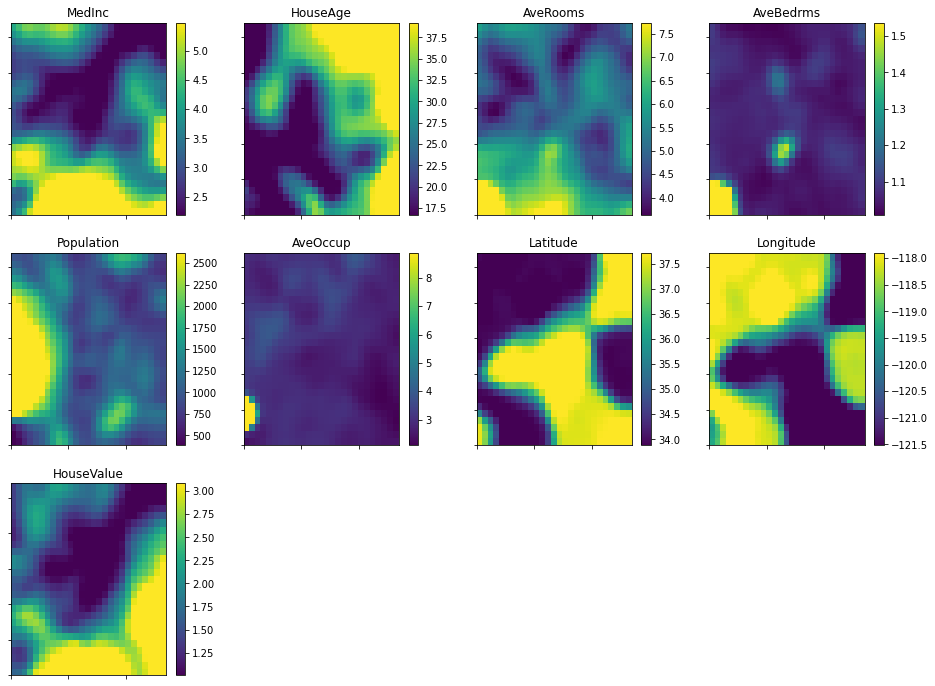

In [66]:
from sompy.visualization.mapview import View2D

view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

In [ ]:
#from sompy.visualization.dotmap import DotMapView

#dots  = DotMapView(10, 10, "dots")
#dots.show(sm, which_dim=[1], colormap=None, cols=None)


#### Hits map

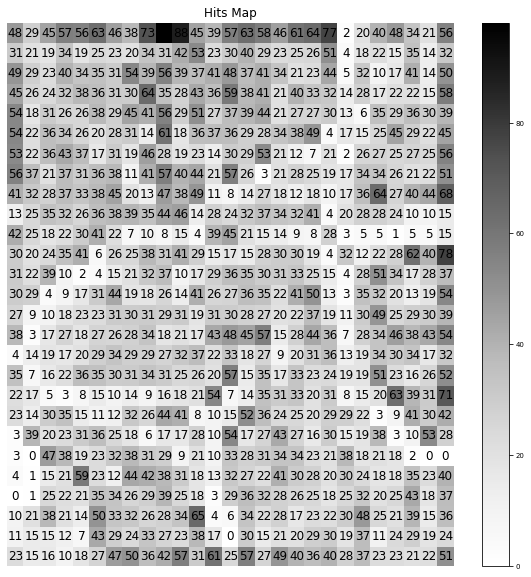

In [67]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=False)

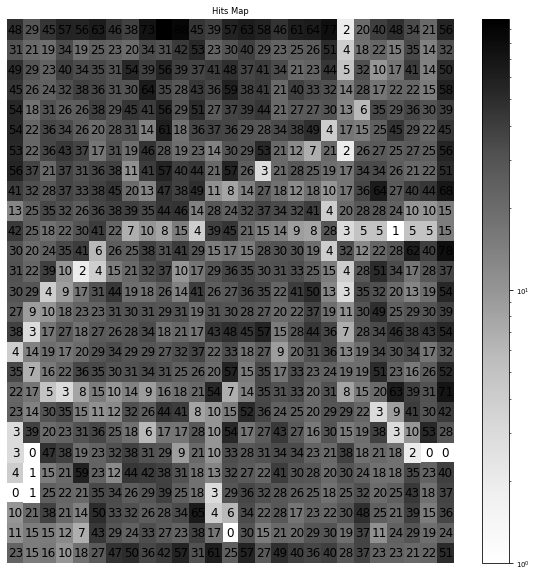

In [68]:
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=12, cmap="Greys", logaritmic=True)

U-Matrix

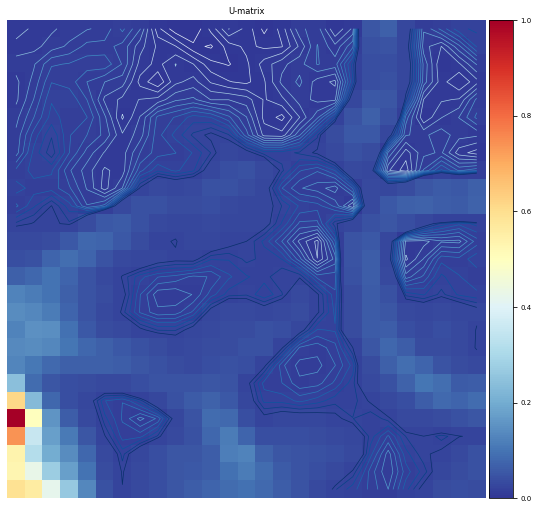

In [69]:
from sompy.visualization.umatrix import UMatrixView

umat  = UMatrixView(width=10,height=10,title='U-matrix', text_size=7)
umat = umat.show(sm, show_data=False,  contour=True, blob=False, labels=False)

#### K-Means clustering

/usr/local/lib/python3.8/dist-packages/sompy/visualization/hitmap.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


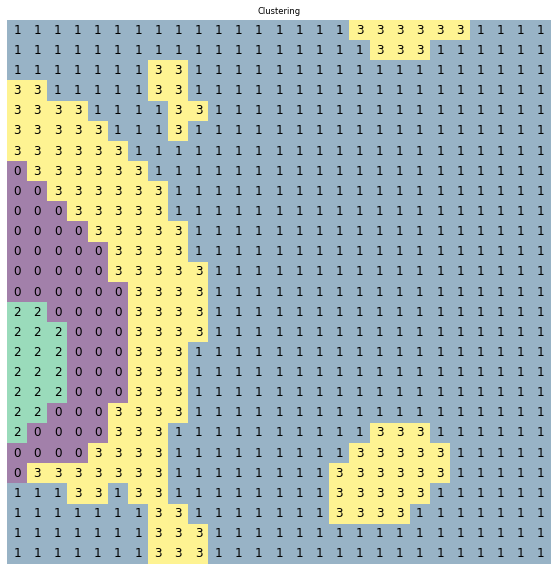

In [70]:
from sompy.visualization.hitmap import HitMapView

sm.cluster(4)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)

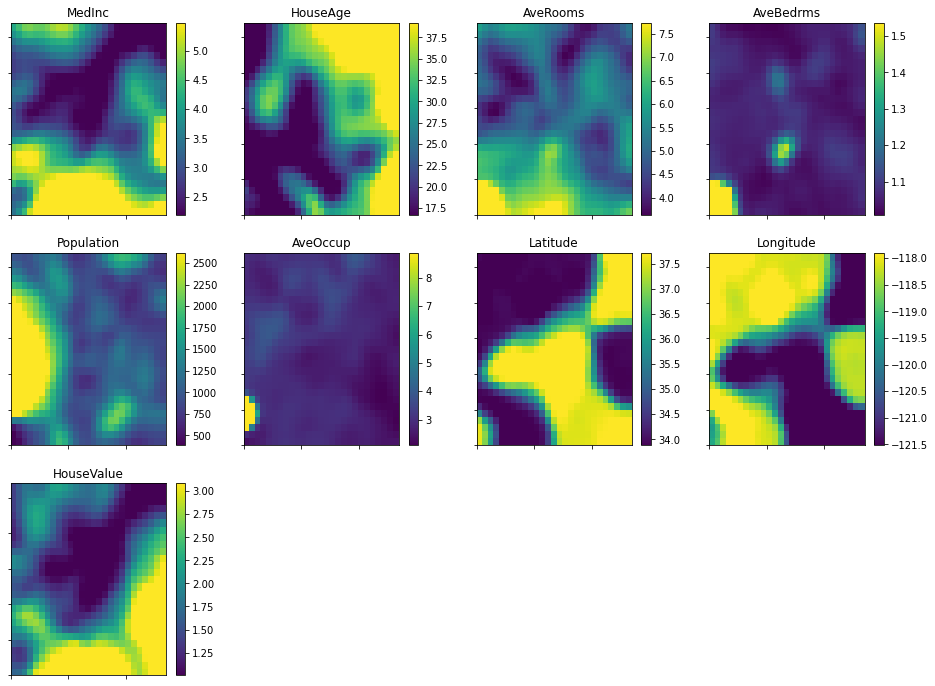

In [71]:

view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

## Conclusions

From the visualizations above we can extract different conclusions like,
- The houses which have, on average, more bedrooms are generally in lower average income areas.
- The highest average occupation occours only in cities where the population is high.
- The latitude and longitude of the samples have a strong negative correlation. It can be because California is diagonally oriented with respect to the coordinates system.
- Houses with the highest average occupancy are placed on the 37 to 38 latitude and -121.6 to -121 longitude; i.e. near San-Francisco area
- Old houses are more likely to have less rooms and less bedrooms on average.
- Low average income areas usually have less rooms and bedrooms than high average income areas
- The house value seems to be related with the average income of the area where it sits.

It is important to remark that there are areas on the map where the density of instances is lower than others. It is represented by the hit map and it should be taken in consideration when interpreting the components map.

The clustering map can be used to understand and profile the different behaviors represented in the components map.